# Final Project DSC 530 

"This data set has overdose deaths and overdose death rates for the different States in the United States for the years 2013 to 2019 and also has different population and income data for the States. In this notebook, we'll be looking at death rates across the different States over time, and seeing what trends we see in the data, and we'll also be looking at what characteristics of the States affect the death rates." (https://www.kaggle.com/code/craigchilvers/us-drug-overdose-eda-and-visualisation/notebook)

**-Exploratory Data Analysis-**

### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

First, I'm importing libraries and datasets.

In [400]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# save filepath 
drug_overdose_filepath = '/Users/debane/Documents/MS Data Science/530 Data Exploration & Analysis/Final Project/CDC Injury Center Drug Overdose Deaths.csv'

# read the data and store data in DataFrame
# adding encoding to prevent a 'UnicodeDecodeError'
drug_overdose_data = pd.read_csv(drug_overdose_filepath, encoding = "ISO-8859-1")

In [401]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [402]:
import thinkstats2
import thinkplot

### Describe what the 5 variables mean in the dataset (Chapter 1).

The dataset I've selected has 24 variables including state & state abbreviation, deaths & adjusted deats by year, poverty rate & Gini coeffcient of income inequlaity, GPP per capita and nominal GDP (determined by multiplying the current year quantity output by the current market price), urban population out of total population, population & population density per km². Throughout this exploration, I am following the author of "Opioids prescription in the US" on Kaggle.

The dataset is small enough to print the whole set in my notebook, so I included it here for reference, but I am commenting out this function so that it doesn't print in the output for the sake of the reader. I'll include the head of the data instead.

In [403]:
## print the data
#drug_overdose_data
drug_overdose_data.head()

,State,State Abbreviation,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,"2018 Age-adjusted Rate (per 100,000 population)",2018 Number of Deaths,"2017 Age-adjusted Rate (per 100,000 population)",2017 Number of Deaths,"2016 Age-adjusted Rate (per 100,000 population)",2016 Number of Deaths,...,"2013 Age-adjusted Rate (per 100,000 population)",2013 Number of Deaths,2019 Poverty rate (percent of persons in poverty),Gini coefficient of income inequality,GDP per capita 2021,GDP (nominal in millions of USD) 2021,Urban population as a percentage of the total population in 2010,Population density per km²,Population,Land Area (km²)
0,Alabama,AL,16.3,768,16.6,775,18.0,835.0,16.2,756.0,...,12.7,598,15.5,0.4847,48475,243555,59.0,37.043399,4858979,131169.9
1,Alaska,AK,17.8,132,14.6,110,20.2,147.0,16.8,128.0,...,14.4,105,10.1,0.4081,69336,54020,66.0,0.499631,738432,1477953.4
2,Arizona,AZ,26.8,1907,23.8,1670,22.2,1532.0,20.3,1382.0,...,18.7,1222,13.5,0.4713,55954,400156,89.8,23.208362,6828065,294207.1
3,Arkansas,AR,13.5,388,15.7,444,15.5,446.0,14.0,401.0,...,11.1,319,16.2,0.4719,47629,143438,56.2,22.098420,2978204,134770.0
4,California,CA,15.0,6198,12.8,5348,11.7,4868.0,11.2,4654.0,...,11.1,4452,11.8,0.4899,83213,3290170,95.0,96.909425,39144818,403932.0


### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

I will use Pandas describe() function to review mean, standard deviation (spread), and percentiles. We will review the tails of distributions later.

In [404]:
drug_overdose_data.describe()

,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,"2018 Age-adjusted Rate (per 100,000 population)",2018 Number of Deaths,"2017 Age-adjusted Rate (per 100,000 population)",2017 Number of Deaths,"2016 Age-adjusted Rate (per 100,000 population)",2016 Number of Deaths,"2015 Age-adjusted Rate (per 100,000 population)",2015 Number of Deaths,...,"2013 Age-adjusted Rate (per 100,000 population)",2013 Number of Deaths,2019 Poverty rate (percent of persons in poverty),Gini coefficient of income inequality,GDP per capita 2021,GDP (nominal in millions of USD) 2021,Urban population as a percentage of the total population in 2010,Population density per km²,Population,Land Area (km²)
count,51.000000,51.000000,51.000000,51.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,51.000000,51.000000,51.000000,51.000000,51.00000,5.100000e+01,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,23.139216,1384.901961,22.039216,1320.921569,22.644000,1398.540000,20.964000,1267.260000,17.800000,1045.580000,...,14.870588,862.392157,12.190196,0.466165,67222.45098,4.431309e+05,74.103922,159.322134,6.302348e+06,1.793738e+05
std,10.184009,1407.558557,10.025389,1320.472171,10.731551,1425.809161,9.372077,1272.251047,6.977515,1006.145972,...,5.051625,849.536958,2.736513,0.023455,24620.89611,5.750120e+05,14.887471,593.702919,7.201114e+06,2.215210e+05
min,8.700000,79.000000,6.900000,57.000000,8.100000,68.000000,6.400000,69.000000,6.900000,61.000000,...,2.800000,20.000000,7.300000,0.406300,41796.00000,3.608900e+04,38.700000,0.499631,5.861070e+05,1.580000e+02
25%,14.650000,379.500000,13.750000,331.000000,13.950000,344.250000,13.475000,332.500000,12.925000,314.750000,...,11.300000,224.000000,10.100000,0.452050,55591.00000,1.010660e+05,65.400000,18.484280,1.749529e+06,8.633595e+04
50%,21.100000,870.000000,21.200000,856.000000,21.400000,991.000000,19.500000,881.500000,16.100000,748.500000,...,14.500000,614.000000,11.800000,0.468000,62331.00000,2.533150e+05,74.200000,41.144896,4.425092e+06,1.388881e+05
75%,30.050000,1998.000000,27.700000,1746.500000,29.000000,1833.000000,24.475000,1604.000000,21.125000,1297.750000,...,17.650000,1089.500000,13.500000,0.479500,71626.50000,5.728645e+05,87.550000,87.745439,6.999208e+06,2.089939e+05
max,52.800000,6198.000000,51.500000,5348.000000,57.800000,5388.000000,52.000000,4728.000000,41.500000,4659.000000,...,32.200000,4452.000000,20.600000,0.542000,219550.00000,3.290170e+06,100.000000,4254.607595,3.914482e+07,1.477953e+06


To clean up the data, I want to deal with any missing values first.

In [405]:
# dataset columns, values, types
drug_overdose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   State                                                             51 non-null     object 
 1   State Abbreviation                                                51 non-null     object 
 2   2019 Age-adjusted Rate (per 100,000 population)                   51 non-null     float64
 3   2019 Number of Deaths                                             51 non-null     int64  
 4   2018 Age-adjusted Rate (per 100,000 population)                   51 non-null     float64
 5   2018 Number of Deaths                                             51 non-null     int64  
 6   2017 Age-adjusted Rate (per 100,000 population)                   50 non-null     float64
 7   2017 Number of Deaths                

From the above information, we can see that there are some null values throughout the data, so I will use the Pandas insull() function to find these.

In [406]:
# look for missing data
drug_overdose_data.isnull().values.any()

True

In [407]:
# use insull() function to sum null values
drug_overdose_data.isnull().sum()

State                                                               0
State Abbreviation                                                  0
2019 Age-adjusted Rate (per 100,000 population)                     0
2019 Number of Deaths                                               0
2018 Age-adjusted Rate (per 100,000 population)                     0
2018 Number of Deaths                                               0
2017 Age-adjusted Rate (per 100,000 population)                     1
2017 Number of Deaths                                               1
2016 Age-adjusted Rate (per 100,000 population)                     1
2016 Number of Deaths                                               1
2015 Age-adjusted Rate (per 100,000 population)                     1
2015 Number of Deaths                                               1
2014 Age-adjusted Rate (per 100,000 population)                     0
2014 Number of Deaths                                               0
2013 Age-adjusted Ra

This dataset includes data for all 50 States and Washington D.C. (District of Columbia). In the fully printed dataset, we can see that the missing data is in the Overdose deaths from the District of Columbia from 2015-2017, so we'll drop the District of Columbia when we need to use 2015-2017 data. In order to remove these values, I need to do some other clean up first.

Change the dates into a date format using Pandas .rename function

In [408]:
drug_overdose_data.rename(columns={'2019 Age-adjusted Rate (per 100,000 population)': '2019', '2018 Age-adjusted Rate (per 100,000 population)': '2018', '2017 Age-adjusted Rate (per 100,000 population)': '2017', '2016 Age-adjusted Rate (per 100,000 population)': '2016', '2015 Age-adjusted Rate (per 100,000 population)': '2015', '2014 Age-adjusted Rate (per 100,000 population)': '2014', '2013 Age-adjusted Rate (per 100,000 population)': '2013'}, inplace=True)

In [409]:
# check it - (commenting out for sake of brevity)
# drug_overdose_data.head()

Now I want to review the deaths in each state by year.

In [410]:
# select years
drug_overdose_features = ['State', '2019', '2018', '2017', '2016', '2015', '2014', '2013']
selected_drug_overdose_data = drug_overdose_data[drug_overdose_features]

# print the table (commented this out so that the whole table doesn't have to print - the NaN values are in row 9)

#pd.set_option('display.max_rows', None)
#selected_drug_overdose_data.head(100)
selected_drug_overdose_data.head(9)

,State,2019,2018,2017,2016,2015,2014,2013
0,Alabama,16.3,16.6,18.0,16.2,15.7,15.2,12.7
1,Alaska,17.8,14.6,20.2,16.8,16.0,16.8,14.4
2,Arizona,26.8,23.8,22.2,20.3,19.0,18.2,18.7
3,Arkansas,13.5,15.7,15.5,14.0,13.8,12.6,11.1
4,California,15.0,12.8,11.7,11.2,11.3,11.1,11.1
5,Colorado,18.0,16.8,17.6,16.6,15.4,16.3,15.5
6,Connecticut,34.7,30.7,30.9,27.4,22.1,17.6,16.0
7,Delaware,48.0,43.8,37.0,30.8,22.0,20.9,18.7
8,District of Columbia,43.2,35.4,NaN,NaN,NaN,14.2,15.0


Now I can remove the NA values using pandas .dropna()

In [411]:
# Remove District of Columbia missing values
new_selected_drug_overdose_data = selected_drug_overdose_data.dropna()

# print the table (commented this out so that the whole table doesn't have to print - the DC row is removed)
#pd.set_option('display.max_rows', None)
#new_selected_drug_overdose_data.head(100)

**-Visualizations-**

I'd like to see the trends over the years to inform further analysis. I can use Seaborn to make a beautiful line graph, but since the data has the states as the row names and the years as the column names, I'll have to reverse this to have the overdose rates over time for each state, so I'll transpose the data table.

In [412]:
# first, set the index to the State
new_selected_drug_overdose_data.set_index("State", inplace=True)
new_selected_drug_overdose_data.rename_axis(None, axis = 0, inplace = True)
new_selected_drug_overdose_data.head()

,2019,2018,2017,2016,2015,2014,2013
Alabama,16.3,16.6,18.0,16.2,15.7,15.2,12.7
Alaska,17.8,14.6,20.2,16.8,16.0,16.8,14.4
Arizona,26.8,23.8,22.2,20.3,19.0,18.2,18.7
Arkansas,13.5,15.7,15.5,14.0,13.8,12.6,11.1
California,15.0,12.8,11.7,11.2,11.3,11.1,11.1


In [413]:
#The transpose function will do the rest!
transposed_drug_overdose_data = new_selected_drug_overdose_data.transpose()
transposed_drug_overdose_data.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2019,16.3,17.8,26.8,13.5,15.0,18.0,34.7,48.0,25.5,13.1,...,10.5,31.2,10.8,18.9,23.8,18.3,15.8,52.8,21.1,14.1
2018,16.6,14.6,23.8,15.7,12.8,16.8,30.7,43.8,22.8,13.2,...,6.9,27.5,10.4,21.2,26.6,17.1,14.8,51.5,19.2,11.1
2017,18.0,20.2,22.2,15.5,11.7,17.6,30.9,37.0,25.1,14.7,...,8.5,26.6,10.5,22.3,23.2,17.9,15.2,57.8,21.2,12.2
2016,16.2,16.8,20.3,14.0,11.2,16.6,27.4,30.8,23.7,13.3,...,8.4,24.5,10.1,22.4,22.2,16.7,14.5,52.0,19.3,17.6
2015,15.7,16.0,19.0,13.8,11.3,15.4,22.1,22.0,16.2,12.7,...,8.4,22.2,9.4,23.4,16.7,12.4,14.7,41.5,15.5,16.4


The table has the years in descending order, so I'll sort it so they are in chronological order.

In [414]:
transposed_drug_overdose_data.sort_index()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2013,12.7,14.4,18.7,11.1,11.1,15.5,16.0,18.7,12.6,10.8,...,6.9,18.1,9.3,22.1,15.1,10.2,13.4,32.2,15.0,17.2
2014,15.2,16.8,18.2,12.6,11.1,16.3,17.6,20.9,13.2,11.9,...,7.8,19.5,9.7,22.4,13.9,11.7,13.3,35.5,15.1,19.4
2015,15.7,16.0,19.0,13.8,11.3,15.4,22.1,22.0,16.2,12.7,...,8.4,22.2,9.4,23.4,16.7,12.4,14.7,41.5,15.5,16.4
2016,16.2,16.8,20.3,14.0,11.2,16.6,27.4,30.8,23.7,13.3,...,8.4,24.5,10.1,22.4,22.2,16.7,14.5,52.0,19.3,17.6
2017,18.0,20.2,22.2,15.5,11.7,17.6,30.9,37.0,25.1,14.7,...,8.5,26.6,10.5,22.3,23.2,17.9,15.2,57.8,21.2,12.2
2018,16.6,14.6,23.8,15.7,12.8,16.8,30.7,43.8,22.8,13.2,...,6.9,27.5,10.4,21.2,26.6,17.1,14.8,51.5,19.2,11.1
2019,16.3,17.8,26.8,13.5,15.0,18.0,34.7,48.0,25.5,13.1,...,10.5,31.2,10.8,18.9,23.8,18.3,15.8,52.8,21.1,14.1


I'm going to save this as a new dataframe now that everything has been transformed.

In [415]:
sorted_drug_overdose_data = transposed_drug_overdose_data.sort_index()

<AxesSubplot:title={'center':'Overdose death rates per 100,000 people, by State'}, ylabel='Overdose death rate (per 100,000 people)'>

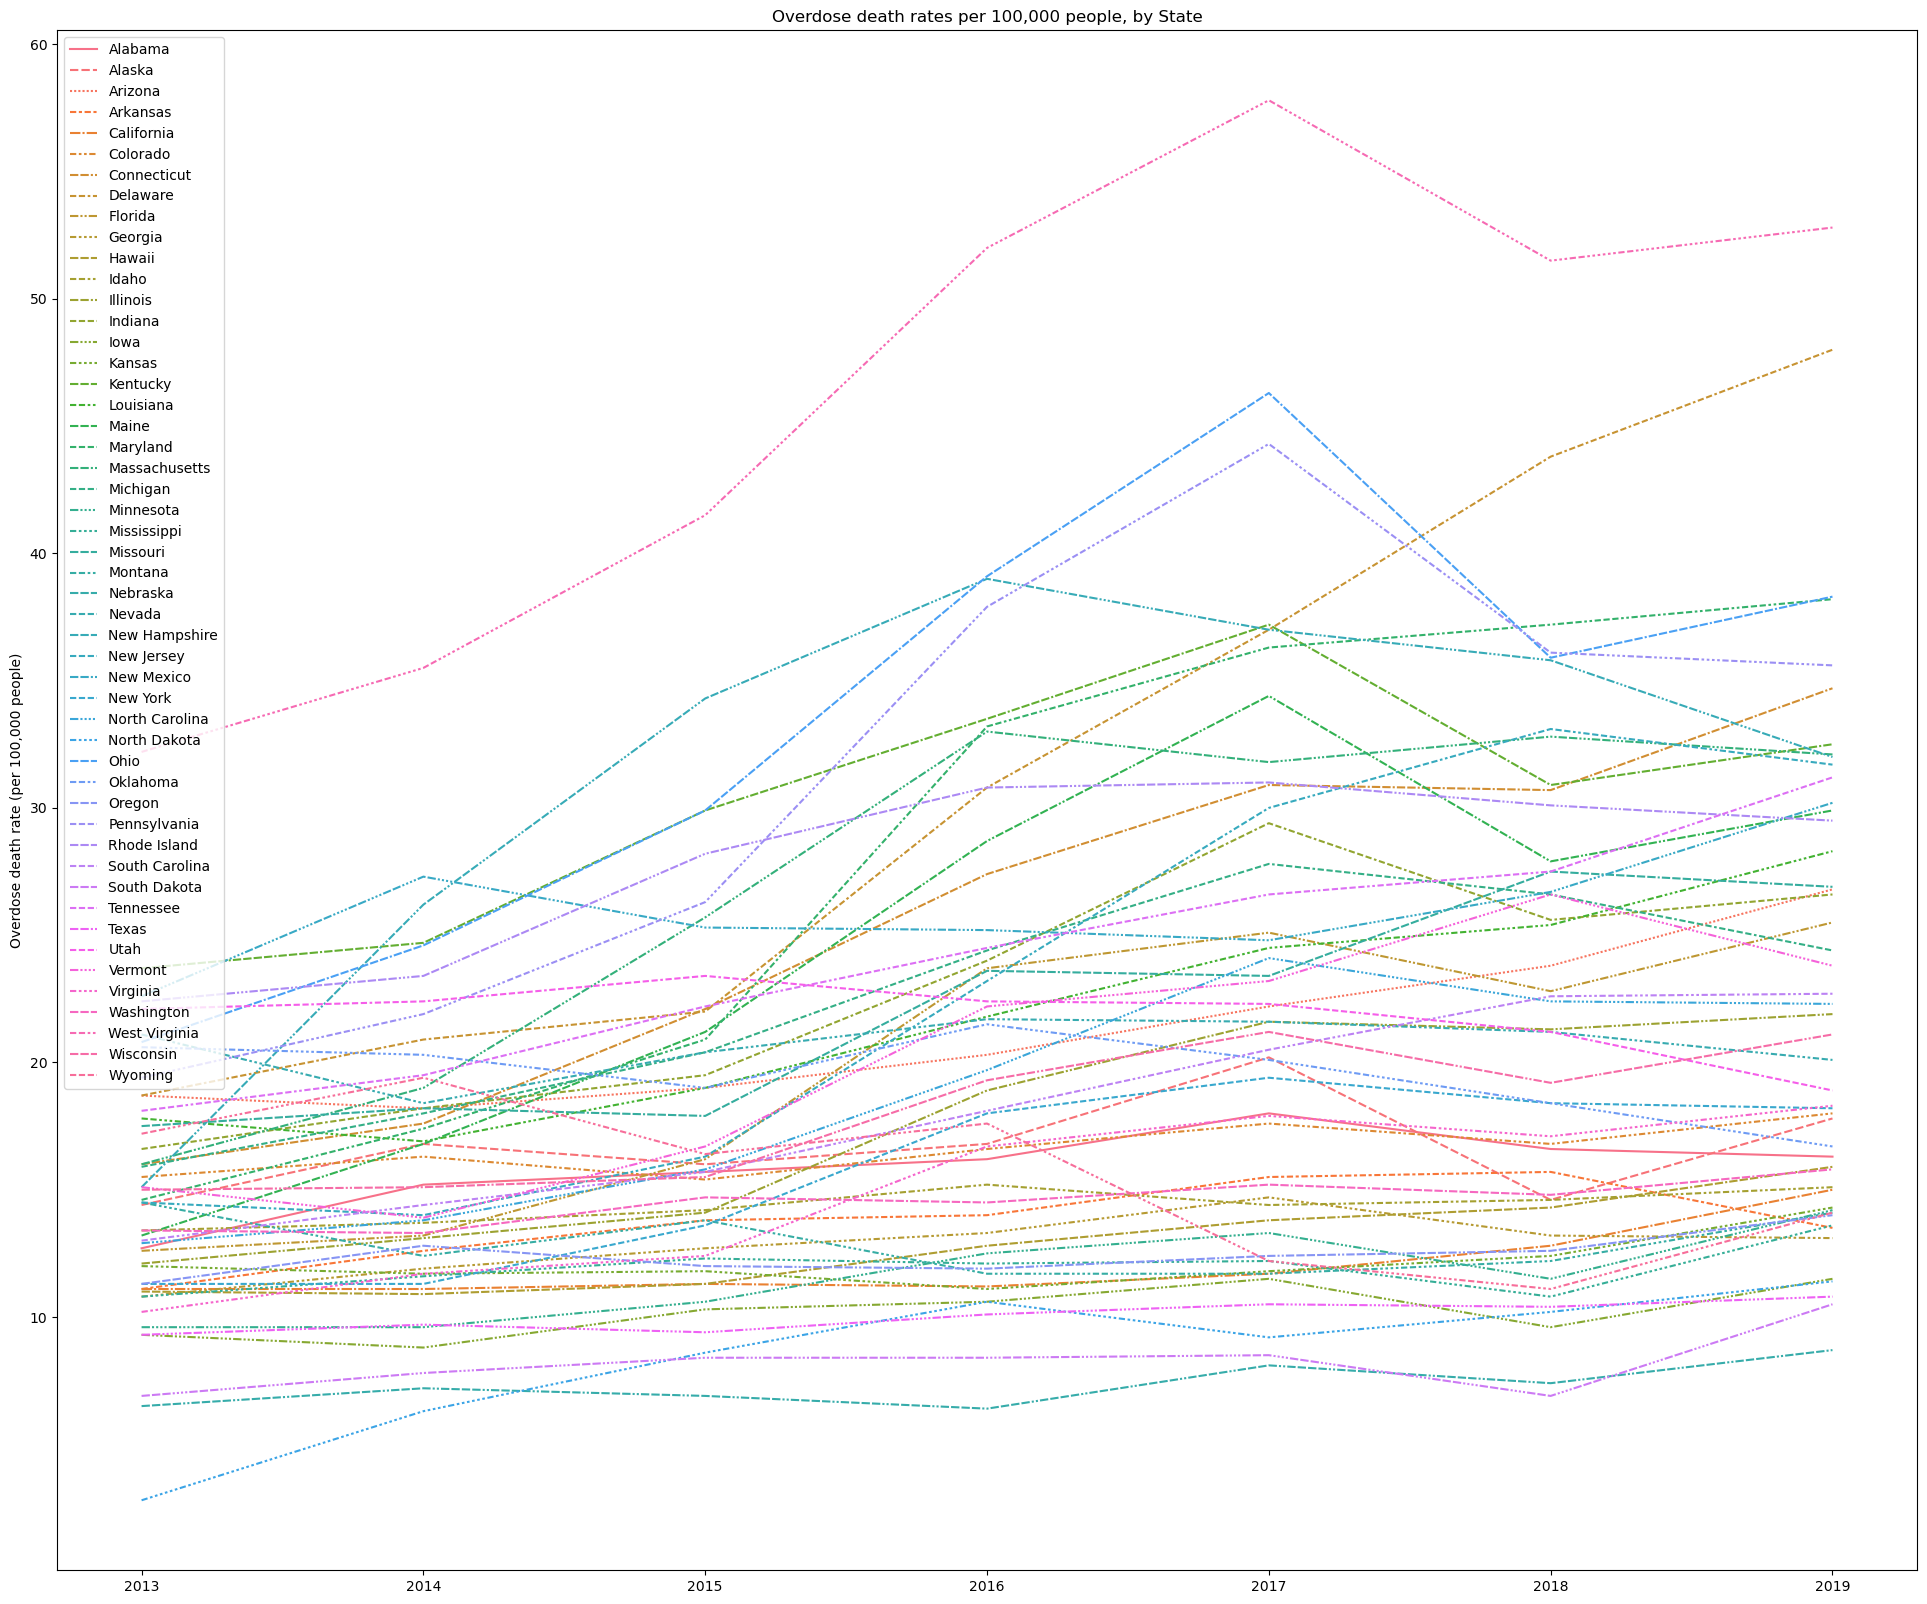

In [416]:
# set the width and height of the figure
plt.figure(figsize=(24,20)) 

# add title
plt.title("Overdose death rates per 100,000 people, by State")

# add label for vertical axis
plt.ylabel("Overdose death rate (per 100,000 people)")

# plot graph
sns.lineplot(data = sorted_drug_overdose_data)

Now I can see that the overdose rate was dramatically increasing over time 2013-2017, but the rates have begun dropping since then. Although we know that the epidemic became worse in 2020, we don't have the data for 2020-2022 here, so we will continue the exploration with a hopeful mindset.

**Histograms**

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

I'm starting with a histogram for overdoses by state using Matplotlib with Seaborn. This plot uses the most recent data (2019) to get a general idea of distribution of overdoses throughout the country.

Text(0, 0.5, 'Overdose deaths')

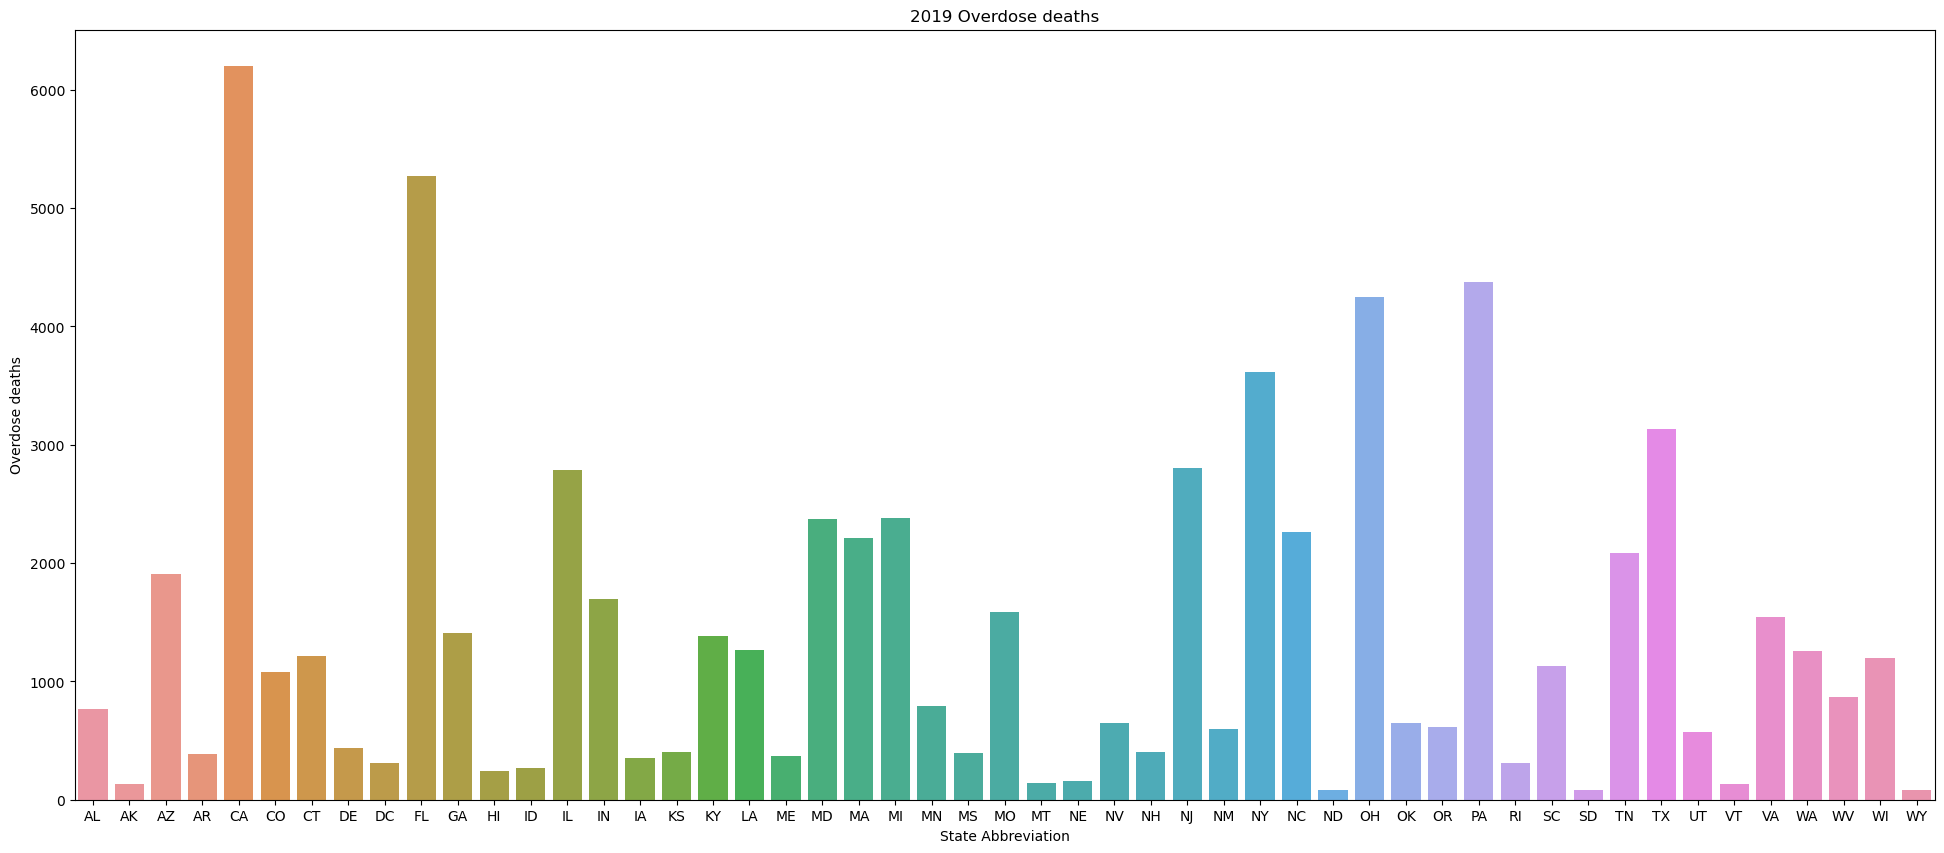

In [417]:
# set the width and height of the figure
plt.figure(figsize=(24,10))

# add title
plt.title("2019 Overdose deaths")

# bar chart showing 2019 Overdose deaths, by State
sns.barplot(x=drug_overdose_data['State Abbreviation'], y=drug_overdose_data['2019 Number of Deaths'])

# add label for vertical axis
plt.ylabel("Overdose deaths")

We can see that the states with the large populations have the highest rates of overdoses , which makes sense, and lets us know that reducing the overdoses in states with the highest rates ((California, Florida, New York, Ohio, Pennsylvania,and Texas) would be influential in reducing overdose rates, but this dosen't necessarily tell us where occurences are most prevalent. To see a more clear representation, I'll use the same method to review overdose rates per population, starting furthest in the past - 2013.

Text(0, 0.5, 'Overdose death rate (per 100,000 people)')

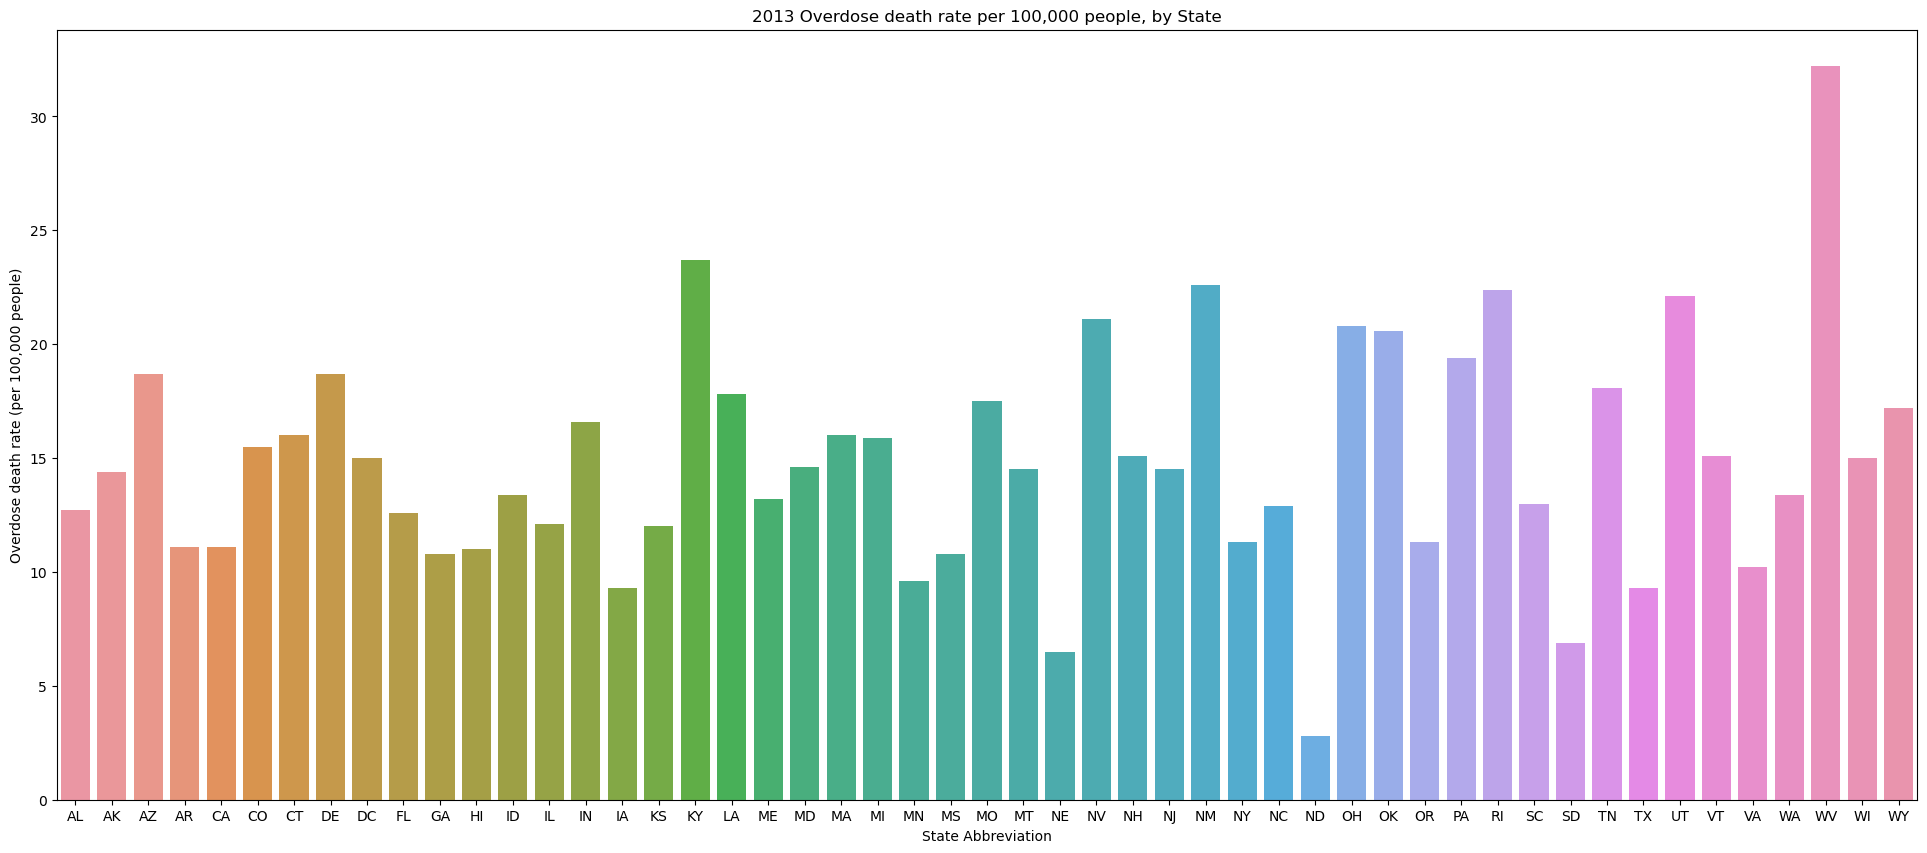

In [418]:
# Set the width and height of the figure
plt.figure(figsize=(24,10))

# Add title
plt.title("2013 Overdose death rate per 100,000 people, by State")

# Bar chart showing 2013 Overdose death rate per 100,000 people, by State
sns.barplot(x=drug_overdose_data['State Abbreviation'], y=drug_overdose_data['2013'])

# Add label for vertical axis
plt.ylabel("Overdose death rate (per 100,000 people)")

Back in 2013 the hardest hit region was the Appalachias (West Virginia, Kentucky, Ohio, Pennsylvania), areas of the South West near Las Vegas (New Mexico, Nevada, Arizona, Utah) and parts of New England (Rhode Island, New Hampshire).

We also see some sparsely populated rural States doing relatively well (North Dakota, South Dakota and Nebraska).

Now I'll look at the most recent data (2019)

Text(0, 0.5, 'Overdose death rate (per 100,000 people)')

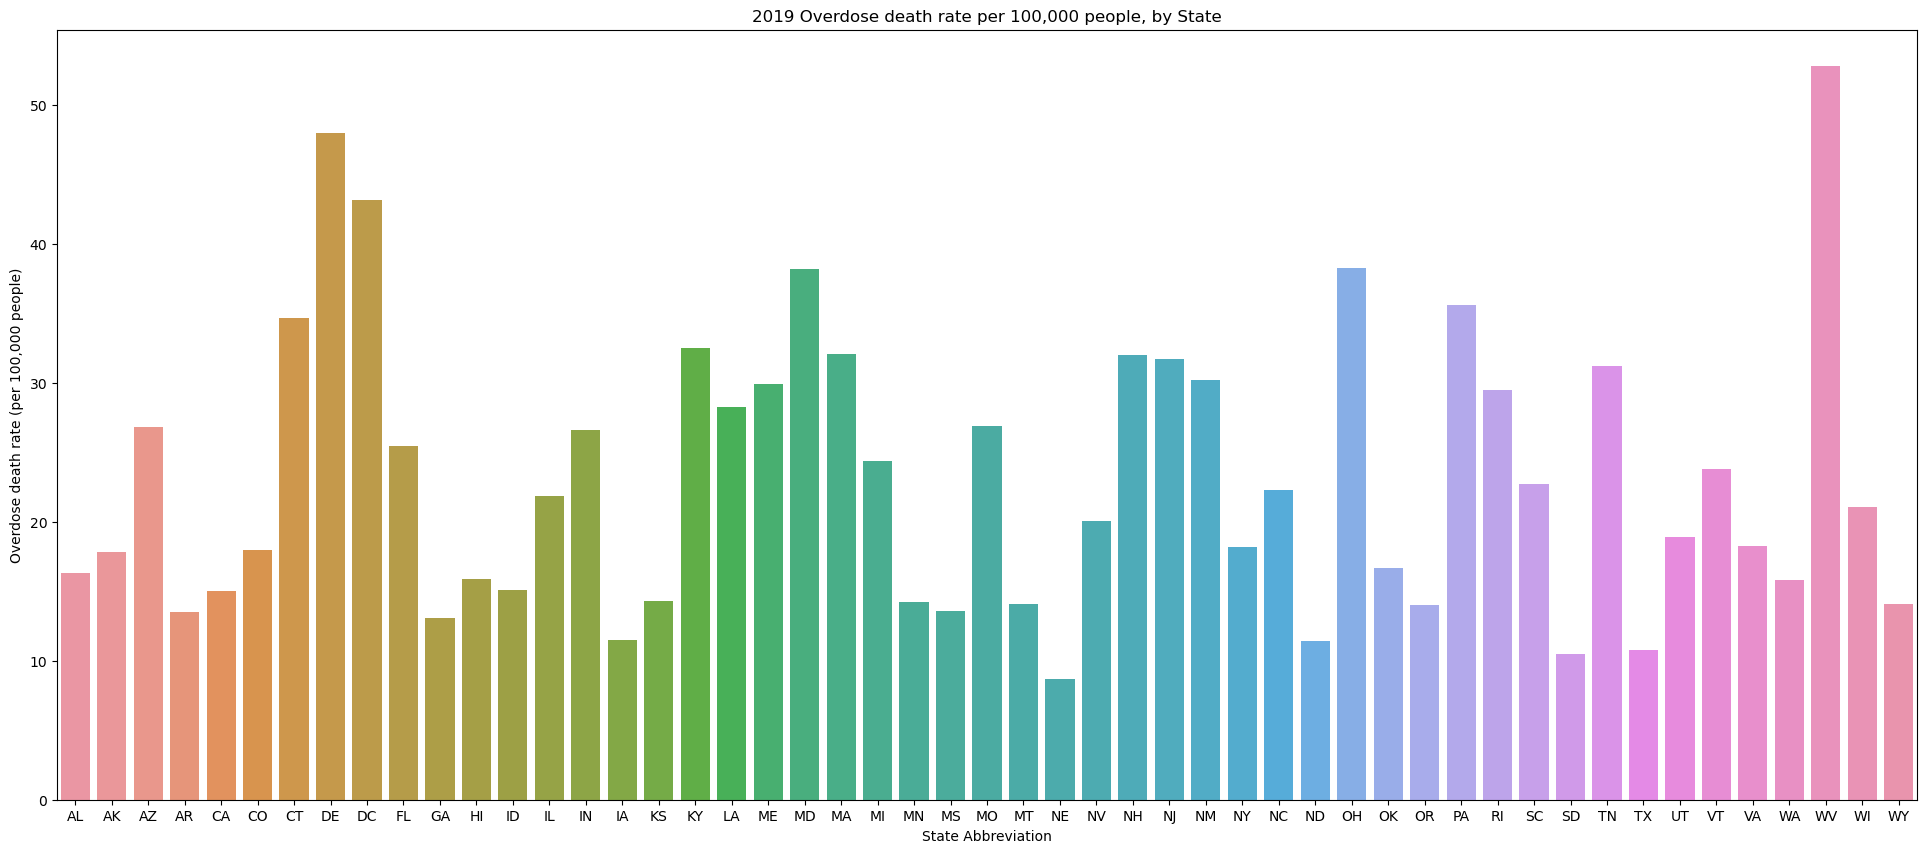

In [419]:
# Set the width and height of the figure
plt.figure(figsize=(24,10))

# Add title
plt.title("2019 Overdose death rate per 100,000 people, by State")

# Bar chart showing 2019 Overdose death rate per 100,000 people, by State
sns.barplot(x=drug_overdose_data['State Abbreviation'], y=drug_overdose_data['2019'])

# Add label for vertical axis
plt.ylabel("Overdose death rate (per 100,000 people)")

By 2019 the situation had gotten much worse across the board. The situation in the Appalachias had deteriorated significantly from it's already high starting rate. Also striking is the deterioration already the US Capitol, which significant increases for the Delaware, the District of Columbia and Maryland.

**Histograms using kernel density**

<AxesSubplot:xlabel='2013', ylabel='Density'>

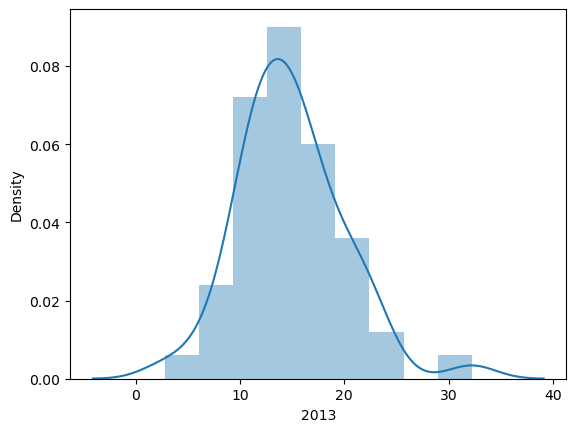

In [420]:
sns.distplot(a=drug_overdose_data['2013'], kde=True)

<AxesSubplot:xlabel='2019', ylabel='Density'>

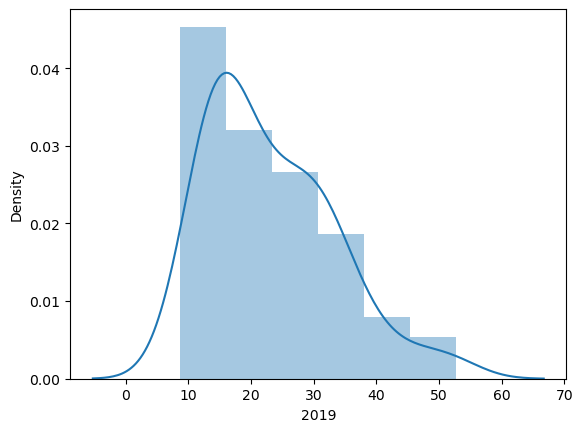

In [421]:
sns.distplot(a=drug_overdose_data['2019'], kde=True)

The number of States with lower rates (<10) has decreased and the number with higher rates (>20) has increased and there is a fat tail on the right hand side of the distribution (more States with very high rates).

**Kernel density estimates (KDEs) (smoothed histograms)**

<AxesSubplot:xlabel='2013', ylabel='Density'>

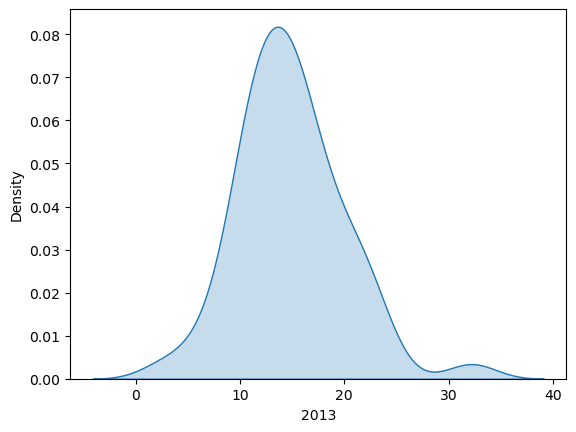

In [422]:
#KDE plot
# 2013
sns.kdeplot(data=drug_overdose_data['2013'], shade=True)

<AxesSubplot:xlabel='2019', ylabel='Density'>

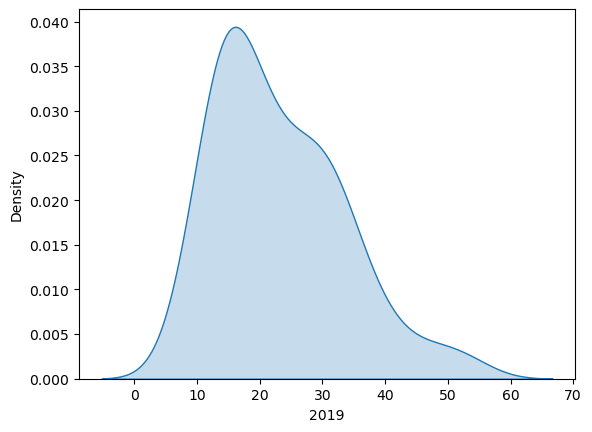

In [423]:
# 2019
sns.kdeplot(data=drug_overdose_data['2019'], shade=True)

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

I want to determine the probabilty of an overdose occuring (using the age-adjusted Rate (per 100,000 population)) so that we can see where is the highest probability of an overdose occuring. First I will rank the rates as percentile.

In [424]:
#clean up dataframe and column names for easier reference
df = drug_overdose_data
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('2', 'x2')
df.columns

Index(['State', 'State_Abbreviation', 'x2019', 'x2019_Number_of_Deaths',
       'x2018', 'x2018_Number_of_Deaths', 'x2017', 'x2017_Number_of_Deaths',
       'x2016', 'x2016_Number_of_Deaths', 'x2015', 'x2015_Number_of_Deaths',
       'x2014', 'x2014_Number_of_Deaths', 'x2013', 'x2013_Number_of_Deaths',
       'x2019_Poverty_rate_(percent_of_persons_in_poverty)',
       'Gini_coefficient_of_income_inequality', 'GDP_per_capita_x20x21',
       'GDP_(nominal_in_millions_of_USD)_x20x21',
       'Urban_population_as_a_percentage_of_the_total_population_in_x2010',
       'Population_density_per_km²', 'Population', 'Land_Area_(km²)'],
      dtype='object')

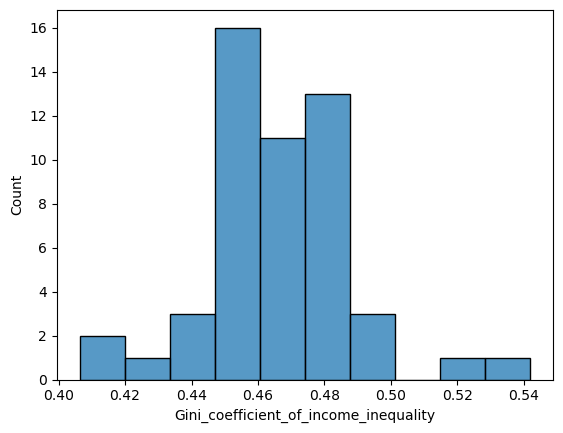

In [425]:
hist = sns.histplot(drug_overdose_data, x= 'Gini_coefficient_of_income_inequality')

<AxesSubplot:ylabel='Frequency'>

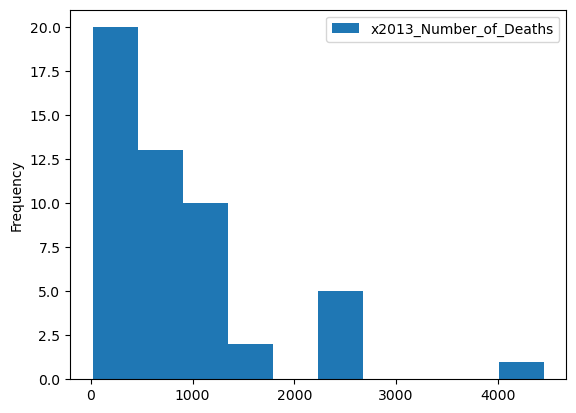

In [426]:
df.plot( x='Population_density_per_km²', y='x2013_Number_of_Deaths', kind='hist')

<AxesSubplot:ylabel='Frequency'>

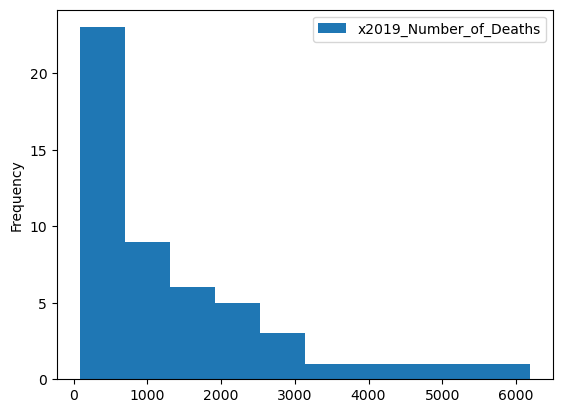

In [427]:
df.plot( x='Population_density_per_km²', y='x2019_Number_of_Deaths', kind='hist')

<AxesSubplot:ylabel='Frequency'>

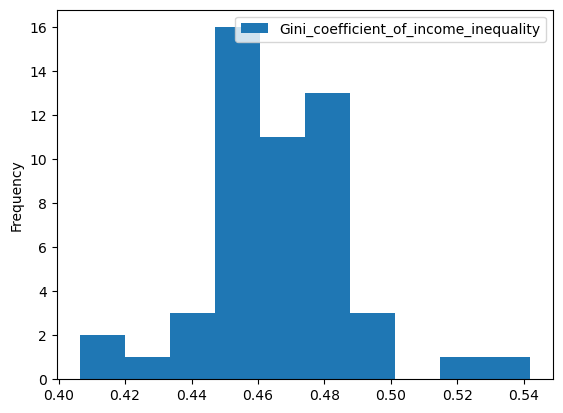

In [428]:
df.plot( x='Population_density_per_km²', y='Gini_coefficient_of_income_inequality', kind='hist')

In [429]:
pmf_2019 = thinkstats2.Pmf(df.x2019_Number_of_Deaths)

In [430]:
pmf_gini = thinkstats2.Pmf(df.Gini_coefficient_of_income_inequality)

In [431]:
pmf_2013 = thinkstats2.Pmf(df.x2013_Number_of_Deaths)

In [432]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [433]:
biased_2019 = BiasPmf(pmf_2019, label="biased")

In [434]:
biased_gini = BiasPmf(pmf_gini, label="biased")

In [435]:
biased_2013 = BiasPmf(pmf_2013, label="biased")

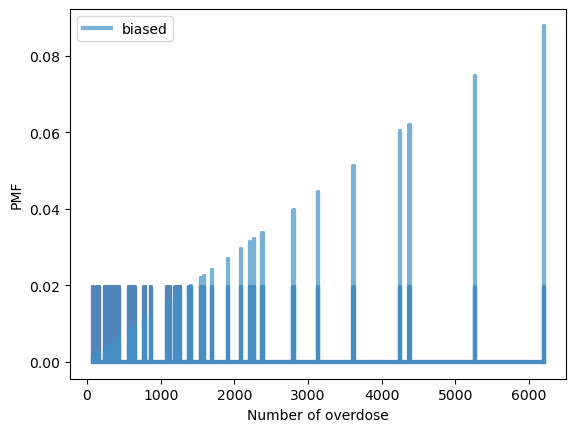

In [436]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_2019, biased])
thinkplot.Config(xlabel="Number of overdose", ylabel="PMF")

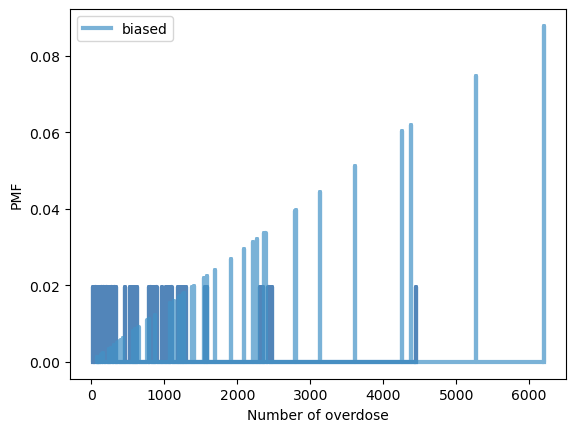

In [437]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_2013, biased])
thinkplot.Config(xlabel="Number of overdose", ylabel="PMF")

In [438]:
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

In [439]:
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [440]:
PmfMean(pmf_2019)

1384.9019607843134

In [441]:
PmfMean(pmf_2013)

862.3921568627452

In [442]:
biased_2019.Mean()

2787.43706640238

In [443]:
PmfMean(pmf_2013)

862.3921568627452

In [444]:
biased_2013.Mean()

1682.8562593788363

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [445]:
def EvalCdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1

    prob = count / len(t)
    return prob

In [446]:
cdf_2019 = thinkstats2.Cdf(df.x2019_Number_of_Deaths, label='2019 Number of Deaths')

In [447]:
cdf_2013 = thinkstats2.Cdf(df.x2019_Number_of_Deaths, label='2013 Number of Deaths')

In [448]:
cdf_gini = thinkstats2.Cdf(df.Gini_coefficient_of_income_inequality, label='2013 Number of Deaths')

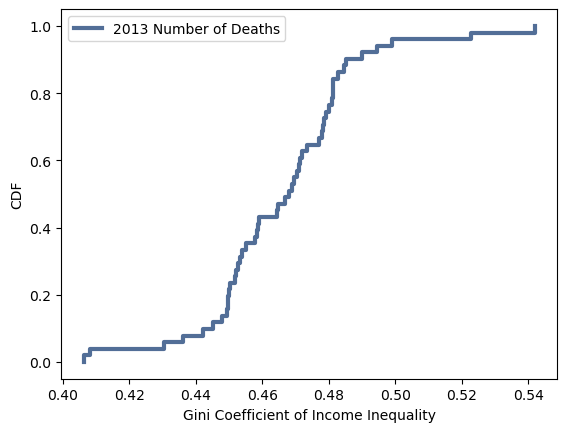

<Figure size 800x600 with 0 Axes>

In [449]:
thinkplot.Cdf(cdf_gini)
thinkplot.Show(xlabel='Gini Coefficient of Income Inequality', ylabel='CDF')

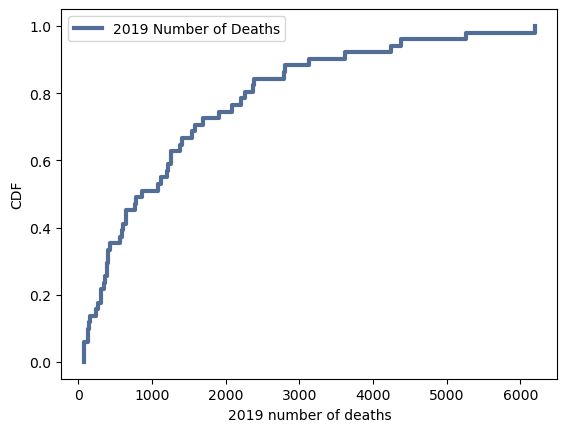

<Figure size 800x600 with 0 Axes>

In [450]:
thinkplot.Cdf(cdf_2019)
thinkplot.Show(xlabel='2019 number of deaths', ylabel='CDF')

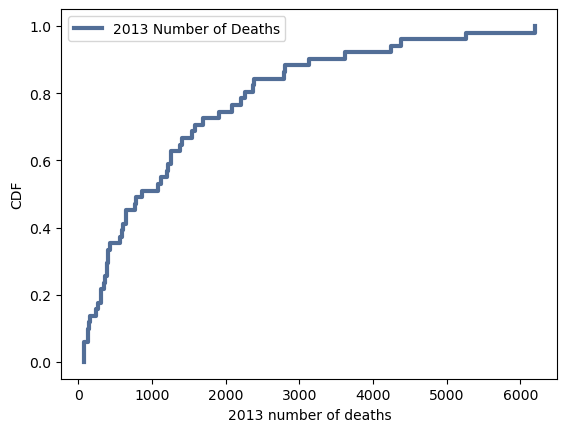

<Figure size 800x600 with 0 Axes>

In [451]:
thinkplot.Cdf(cdf_2013)
thinkplot.Show(xlabel='2013 number of deaths', ylabel='CDF')

In [452]:
cdf_2019.Prob(3000)

0.8823529411764706

In [453]:
cdf_2013.Prob(3000)

0.8823529411764706

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [454]:
deaths = df.x2019_Number_of_Deaths

In [455]:
def MakeNormalModel(deaths):
    cdf = thinkstats2.Cdf(deaths, label="deaths")

    mean, var = thinkstats2.TrimmedMeanVar(deaths)
    std = np.sqrt(var)
    print("n, mean, std", len(deaths), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

In [456]:
def MakeNormalPlot(deaths):
    mean, var = thinkstats2.TrimmedMeanVar(deaths, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(deaths)
    thinkplot.Plot(xs, ys, label="deaths")

n, mean, std 51 nan nan


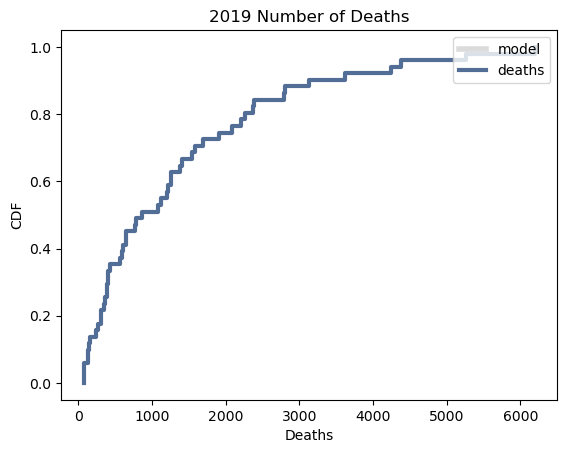

In [457]:
MakeNormalModel(deaths)
thinkplot.Config(
    title="2019 Number of Deaths",
    xlabel="Deaths",
    ylabel="CDF",
    loc="upper right",
)

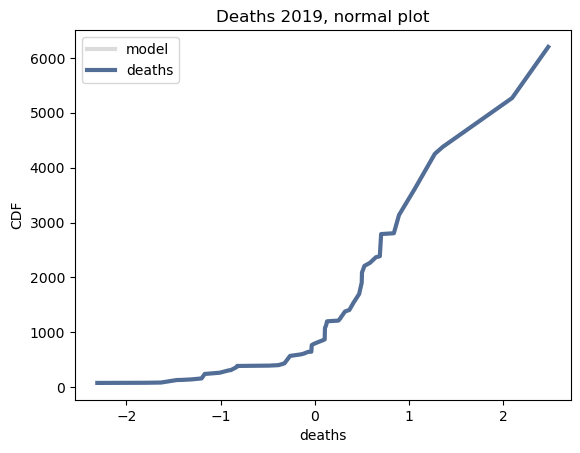

In [458]:
MakeNormalPlot(deaths)
thinkplot.Config(
    title="Deaths 2019, normal plot",
    xlabel="deaths",
    ylabel="CDF",
    loc="upper left",
)

n, mean, std 51 nan nan


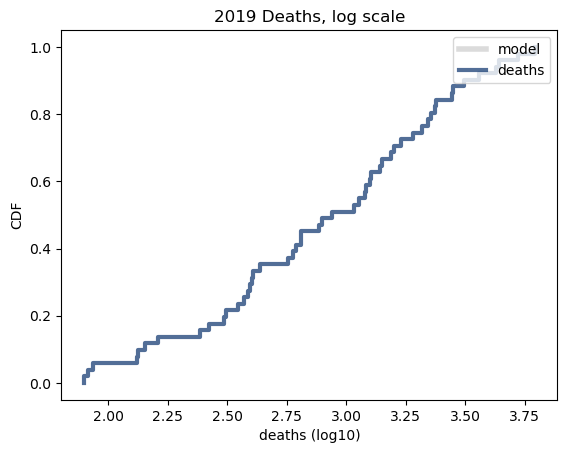

In [459]:
log_deaths = np.log10(deaths)
MakeNormalModel(log_deaths)
thinkplot.Config(
    title="2019 Deaths, log scale",
    xlabel="deaths (log10)",
    ylabel="CDF",
    loc="upper right",
)

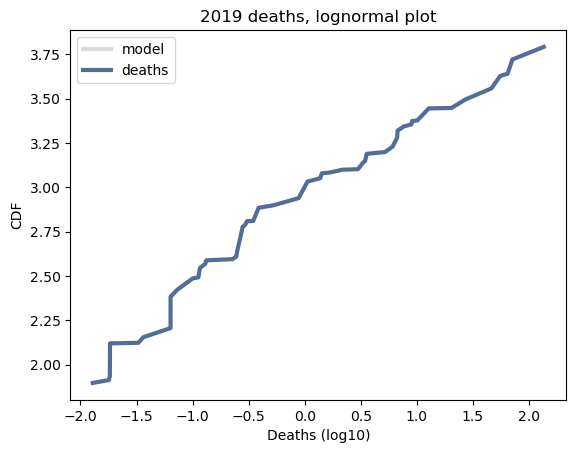

In [460]:
MakeNormalPlot(log_deaths)
thinkplot.Config(
    title="2019 deaths, lognormal plot",
    xlabel="Deaths (log10)",
    ylabel="CDF",
    loc="upper left",
)

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

<AxesSubplot:xlabel='Gini_coefficient_of_income_inequality', ylabel='x2019_Number_of_Deaths'>

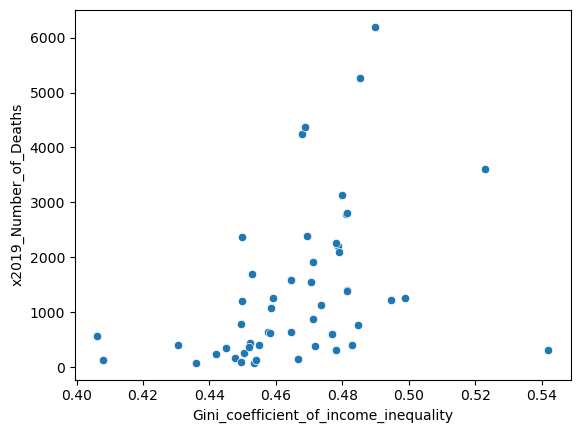

In [461]:
sns.scatterplot(data=df, x= "Gini_coefficient_of_income_inequality", y="x2019_Number_of_Deaths")

<AxesSubplot:xlabel='Urban_population_as_a_percentage_of_the_total_population_in_x2010', ylabel='x2019_Number_of_Deaths'>

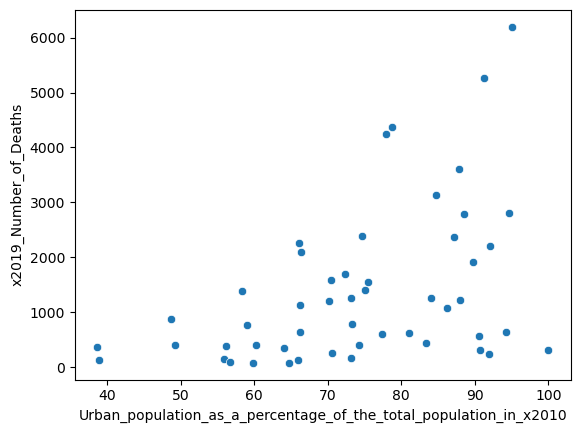

In [462]:
sns.scatterplot(data=df, x= "Urban_population_as_a_percentage_of_the_total_population_in_x2010", y="x2019_Number_of_Deaths")

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [463]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [464]:
cleaned = df.dropna(subset=['x2019_Number_of_Deaths', 'Gini_coefficient_of_income_inequality'])
data = cleaned.x2019_Number_of_Deaths.values, cleaned.Gini_coefficient_of_income_inequality.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.007

This statistically significant, indicating that there is liklely a correlation between these variables.

In [465]:
df.columns

Index(['State', 'State_Abbreviation', 'x2019', 'x2019_Number_of_Deaths',
       'x2018', 'x2018_Number_of_Deaths', 'x2017', 'x2017_Number_of_Deaths',
       'x2016', 'x2016_Number_of_Deaths', 'x2015', 'x2015_Number_of_Deaths',
       'x2014', 'x2014_Number_of_Deaths', 'x2013', 'x2013_Number_of_Deaths',
       'x2019_Poverty_rate_(percent_of_persons_in_poverty)',
       'Gini_coefficient_of_income_inequality', 'GDP_per_capita_x20x21',
       'GDP_(nominal_in_millions_of_USD)_x20x21',
       'Urban_population_as_a_percentage_of_the_total_population_in_x2010',
       'Population_density_per_km²', 'Population', 'Land_Area_(km²)'],
      dtype='object')

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11

In [466]:
from sklearn import linear_model
import statsmodels.api as sm

In [467]:
x = df[['Gini_coefficient_of_income_inequality', 'Population_density_per_km²']]
y = df['x2019_Number_of_Deaths']

In [468]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [469]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -14726.530438181831
Coefficients: 
 [ 3.48409495e+04 -8.17140415e-01]


In [470]:
x = sm.add_constant(x) # adding a constant

In [471]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [472]:
print_model = model.summary()
print(print_model)

                              OLS Regression Results                              
Dep. Variable:     x2019_Number_of_Deaths   R-squared:                       0.252
Model:                                OLS   Adj. R-squared:                  0.221
Method:                     Least Squares   F-statistic:                     8.081
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):           0.000944
Time:                            17:05:27   Log-Likelihood:                -434.19
No. Observations:                      51   AIC:                             874.4
Df Residuals:                          48   BIC:                             880.2
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

**-Conclusion-**

### Outcome of your EDA
### What do you feel was missed during the analysis? Were there any variables you felt could have helped in the analysis? Were there any assumptions made you felt were incorrect? What challenges did you face, what did you not fully understand?

This EDA super fun and interesting. I enjoyed reviewing the data as a whole, cleaning it, making and seeing the visualizations, and attempting to find relationships between variables. I utilized Because there were so many variables, I likely could have explored a lot further, but narrowing my hypothesis down was still a good exploration. 

I could have created a density map for the country to visualize where opioid rates were highest. In the future, I would like to have more information about geography, like zip code, to be able to explore regions that have a higher rate of opioid abuse. Instead of focusing on regions, I was able to focus on factors influencing the rates overall. I do think I could have used the PMF and CDF functions in a more effective way. I appreciate having access to the ThinkStats and ThinkPlot libraries for executing functions. I also enjoyed using Pandas, Seaborn, and MatPlotLib to advance my capabilities in Python.

My hypothesis was that there is a significant correlation between the Gini Coefficient of Income Equality and the rate of overdose deaths. In the regression portion, I also included population density because the spread of opioid usage can occur rapidly in more densely populated areas with wider access to both prescription and street drugs. My hypothesis was proven correct based on the hypothesis test and regression results showing that there is very, very small chance (p-value) that the null hypothesis is true. These outcomes indicate that there is statistical significance between the income inequality and rate of overdose deaths. In a real-world scenario, I would hope to use this information (and further analysis) to determine hotspots for opioid crises, and hope to expand access to opioid-care facilities in these regions.